We built an xgboost model and with the help of feature importance feature we found that the following features impact the house prices to a larger extent.

1.room_type

2.bedrooms

3.city_Sf

4.accommodates

5.bathrooms

6.distance_to_centre

7.property_type

8.cancellation_policy

9.number_of_reviews



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import warnings
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
df = pd.read_csv(r'C:\Users\ck\Downloads\yaswanth downloads\case study\train.csv')

C:\Users\ck\anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\ck\anaconda3\lib\site-packages\seaborn\categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\ck\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


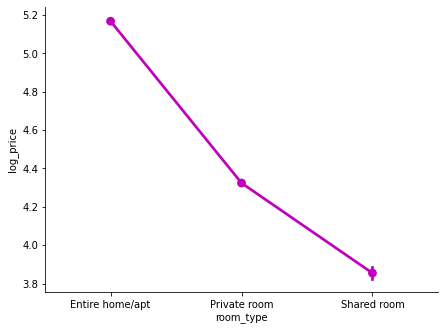

In [3]:
sns.factorplot('room_type', 'log_price', data = df, color = 'm', \
               estimator = np.mean, size = 4.5,  aspect=1.35)

<AxesSubplot:xlabel='room_type', ylabel='log_price'>

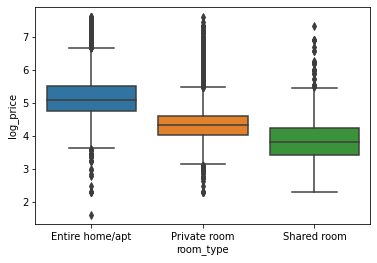

In [4]:

sns.boxplot(x=df['room_type'],y=df['log_price'])

Entire home/apt has higher mean log_price compared to private_rooma and shared_room

<AxesSubplot:xlabel='bedrooms', ylabel='log_price'>

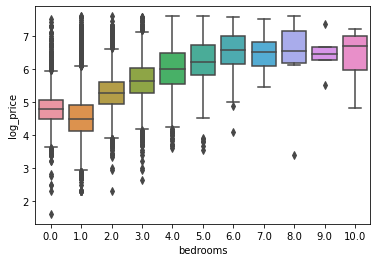

In [5]:
sns.boxplot(x=df['bedrooms'],y=df['log_price'])

We can see an increase in the log_price as the number of bedrooms increase from 1 to 6

C:\Users\ck\anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\ck\anaconda3\lib\site-packages\seaborn\categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\ck\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


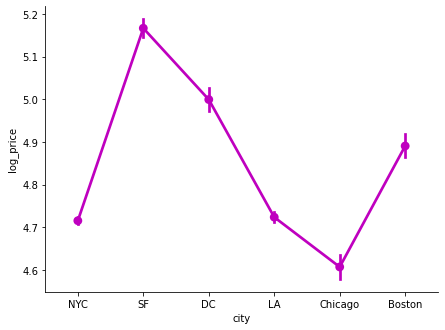

In [6]:
sns.factorplot('city', 'log_price', data = df, color = 'm', \
               estimator = np.mean, size = 4.5,  aspect=1.35)

we see that the highest mean log_price is for san-fransisco whereas lowest is for chicago

C:\Users\ck\anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\ck\anaconda3\lib\site-packages\seaborn\categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\ck\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


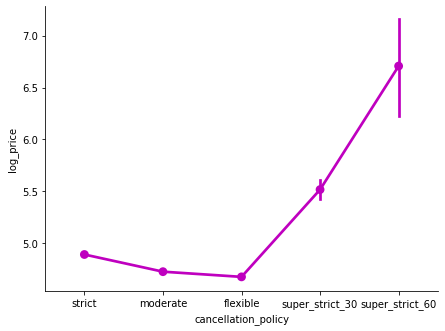

In [7]:
sns.factorplot('cancellation_policy', 'log_price', data = df, color = 'm', \
               estimator = np.mean, size = 4.5,  aspect=1.35)

<AxesSubplot:xlabel='accommodates', ylabel='count'>

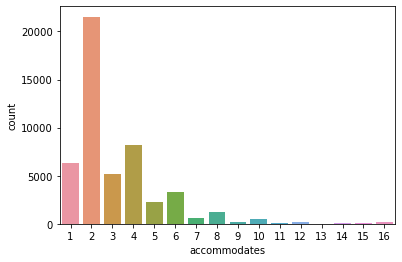

In [8]:
#plotting frequency plot of accommodates
sns.countplot(x=df['accommodates'])

Majority of the houses could accommodate only 2 persons

<AxesSubplot:xlabel='number_of_reviews', ylabel='log_price'>

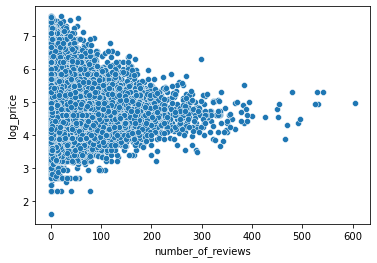

In [9]:
#plotting scatterplot of 'bathrooms' and 'log_price'
sns.scatterplot(x=df['number_of_reviews'],y=df['log_price'])

# Amenities

In [10]:
import itertools
from collections import Counter
import collections
import operator

In [11]:
#making an entire list of amenities
amenities = df["amenities"].tolist()#.value_counts()
l = [[tok.strip() for tok in a.replace("\"", "")[1:-1].split(",") if tok.strip() != ""] for a in amenities]
y=list(itertools.chain(*l))

In [12]:
#dictionary with amenities as keys and its count as values
count_amenities = collections.Counter(y)

In [13]:
#dictionary with amenities as keys and its count as values in decreasing order
dict(sorted(count_amenities.items(), key=operator.itemgetter(1),reverse=True))

{'Wireless Internet': 48055,
 'Kitchen': 45598,
 'Heating': 45231,
 'Essentials': 43171,
 'Smoke detector': 41545,
 'Air conditioning': 37252,
 'TV': 35313,
 'Shampoo': 33372,
 'Hangers': 33224,
 'Carbon monoxide detector': 31735,
 'Internet': 30040,
 'Laptop friendly workspace': 29531,
 'Hair dryer': 29294,
 'Washer': 29017,
 'Dryer': 28744,
 'Iron': 28134,
 'Family/kid friendly': 24837,
 'Fire extinguisher': 20659,
 'First aid kit': 18587,
 'translation missing: en.hosting_amenity_50': 17152,
 'Cable TV': 16265,
 'Free parking on premises': 15958,
 'translation missing: en.hosting_amenity_49': 13853,
 '24-hour check-in': 12798,
 'Lock on bedroom door': 12075,
 'Buzzer/wireless intercom': 11393,
 'Safety card': 7710,
 'Self Check-In': 7417,
 'Elevator': 7285,
 'Pets allowed': 6811,
 'Pets live on this property': 6537,
 'Indoor fireplace': 6305,
 'Breakfast': 5592,
 'Gym': 5040,
 'Private entrance': 4893,
 'Elevator in building': 4375,
 'Hot tub': 4282,
 'Pool': 4265,
 'Lockbox': 3851,

In [14]:
y=list(itertools.chain(*l))

In [15]:
y[0:15]

['Wireless Internet',
 'Air conditioning',
 'Kitchen',
 'Heating',
 'Family/kid friendly',
 'Essentials',
 'Hair dryer',
 'Iron',
 'translation missing: en.hosting_amenity_50',
 'Wireless Internet',
 'Air conditioning',
 'Kitchen',
 'Heating',
 'Family/kid friendly',
 'Washer']

C:\Users\ck\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

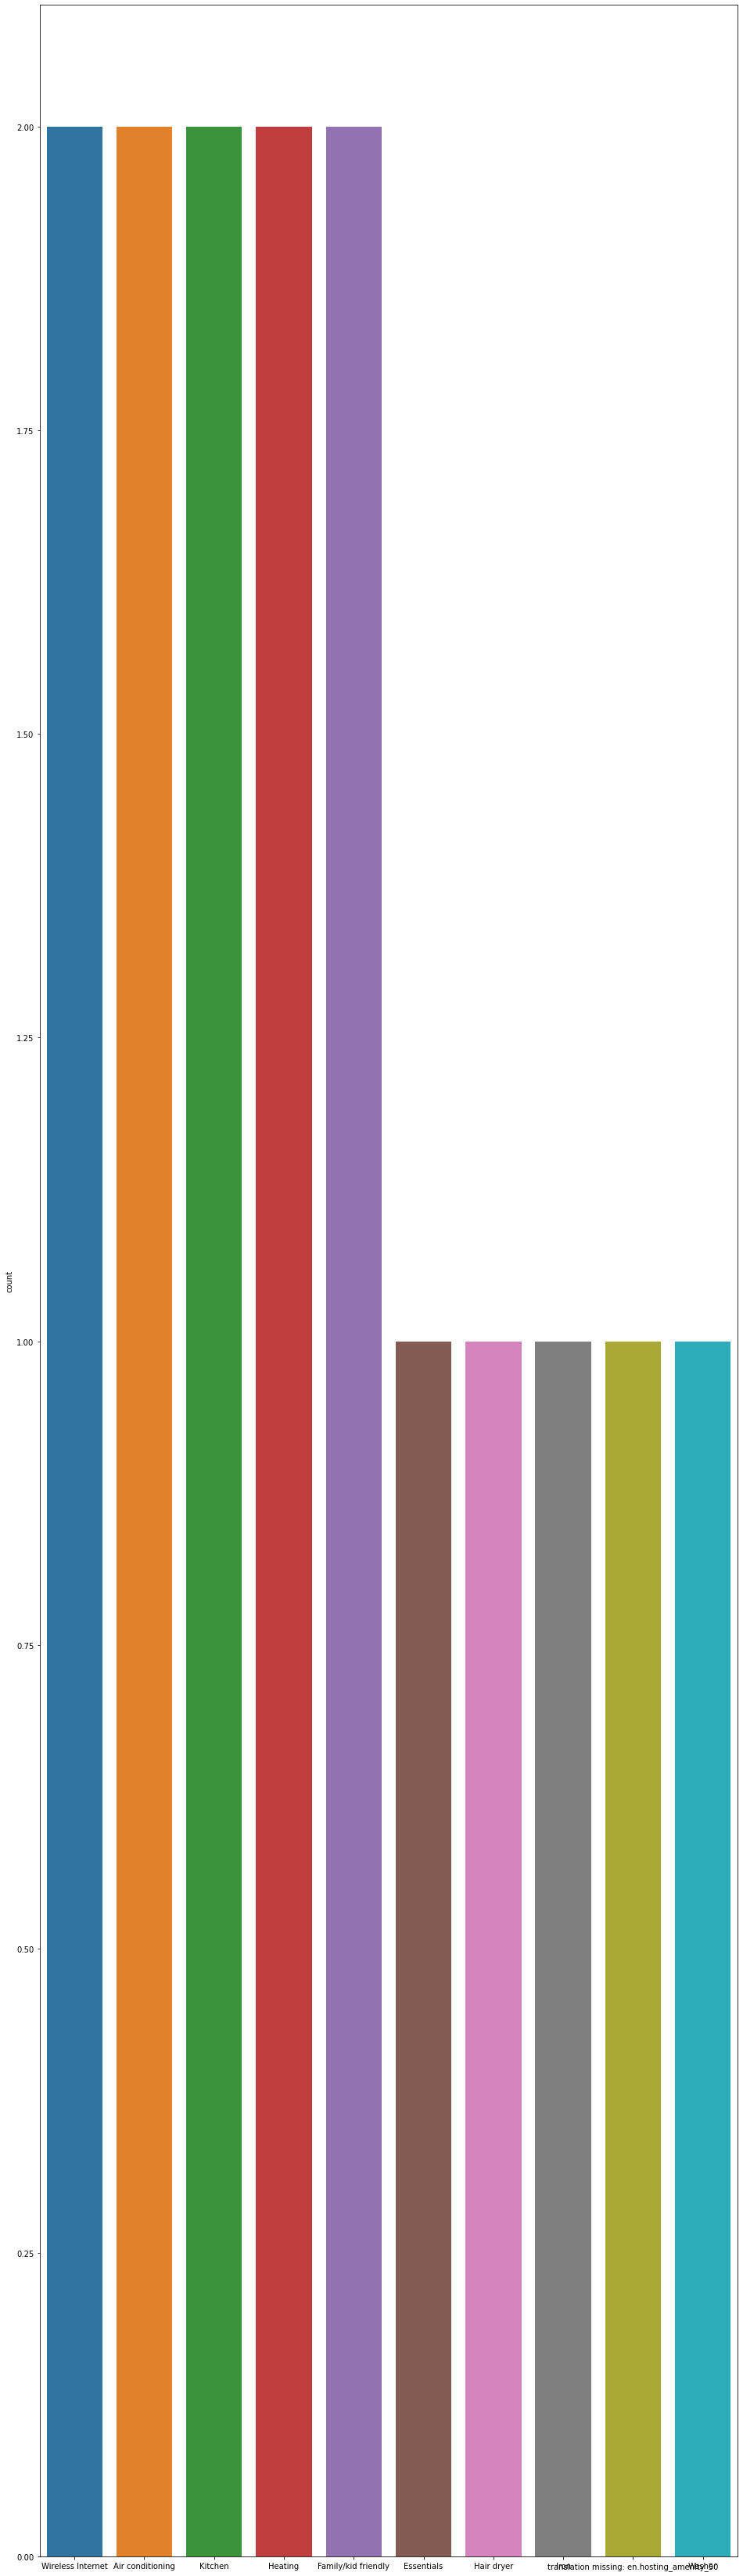

In [16]:
#countplot of amenities
plt.figure(figsize=(16, 60))
sns.countplot(y[0:15])

<AxesSubplot:xlabel='count'>

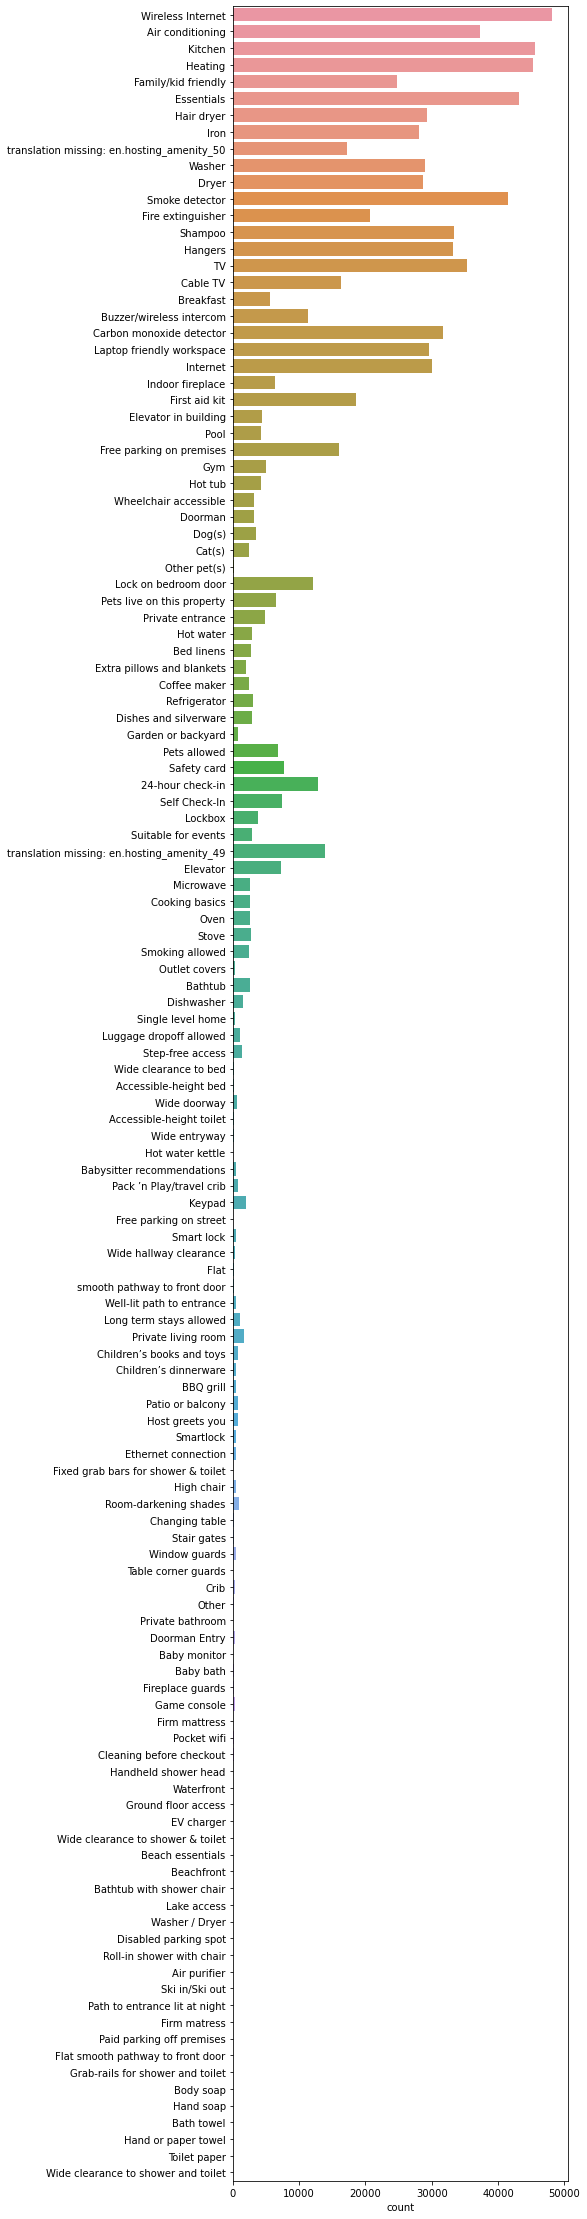

In [17]:
#countplot of amenities
plt.figure(figsize=(6, 40))
sns.countplot(y=list(itertools.chain(*l)))

# Time Series data

In [18]:
# Converting to datetime
df.host_since = pd.to_datetime(df.host_since) 
df.first_review = pd.to_datetime(df.first_review)

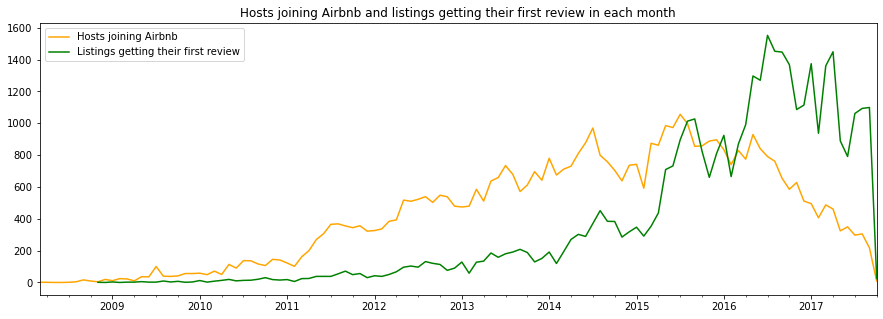

In [19]:
plt.figure(figsize=(15,5))
df.set_index('host_since').resample('MS').size().plot(label='Hosts joining Airbnb', color='orange')
df.set_index('first_review').resample('MS').size().plot(label='Listings getting their first review', color='green')
plt.title('Hosts joining Airbnb and listings getting their first review in each month')
plt.legend()
plt.xlim('2008-03-01', '2017-10-04') # Limiting to whole months
plt.xlabel('')
plt.ylabel('')
plt.show()

In [20]:
# Creating dataframes for time series analysis
ts_host_since = pd.DataFrame(df.set_index('host_since').resample('MS').size())
ts_first_review = pd.DataFrame(df.set_index('first_review').resample('MS').size())

# Renaming columns
ts_host_since = ts_host_since.rename(columns={0: 'hosts'})
ts_host_since.index.rename('month', inplace=True)
ts_first_review = ts_first_review.rename(columns={0: 'reviews'})
ts_first_review.index.rename('month', inplace=True)

In [21]:
def decompose_time_series(df, title=''):
    """
    Plots the original time series and its decomposition into trend, seasonal and residual.
    """
    # Decomposing the time series
    decomposition = seasonal_decompose(df)
    
    # Getting the trend, seasonality and noise
    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid
    
    # Plotting the original time series and the decomposition
    plt.figure(figsize=(12,8))
    plt.suptitle(title, fontsize=14, y=1)
    plt.subplots_adjust(top=0.80)
    plt.subplot(411)
    plt.plot(df, label='Original')
    plt.legend(loc='upper left')
    plt.subplot(412)
    plt.plot(trend, label='Trend')
    plt.legend(loc='upper left')
    plt.subplot(413)
    plt.plot(seasonal,label='Seasonality')
    plt.legend(loc='upper left')
    plt.subplot(414)
    plt.plot(residual, label='Residuals')
    plt.legend(loc='upper left')
    plt.tight_layout()

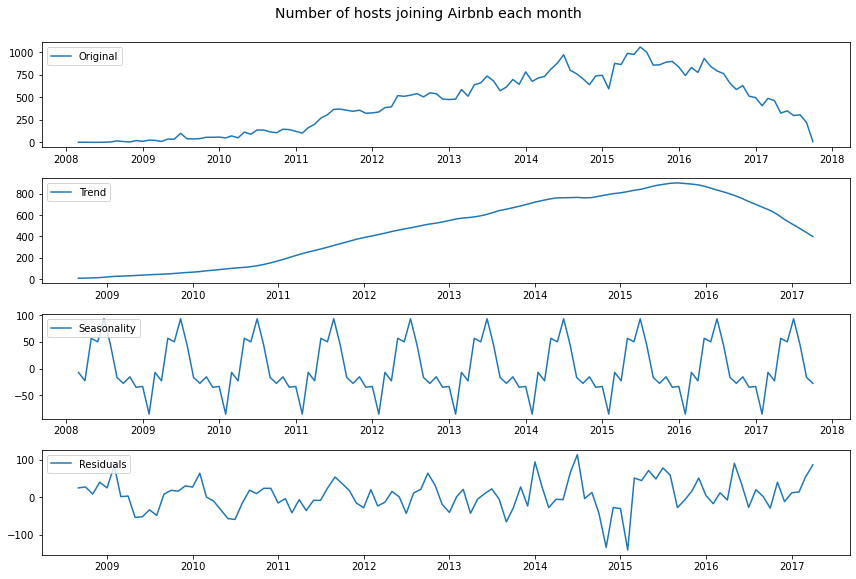

In [22]:
decompose_time_series(ts_host_since, title='Number of hosts joining Airbnb each month')

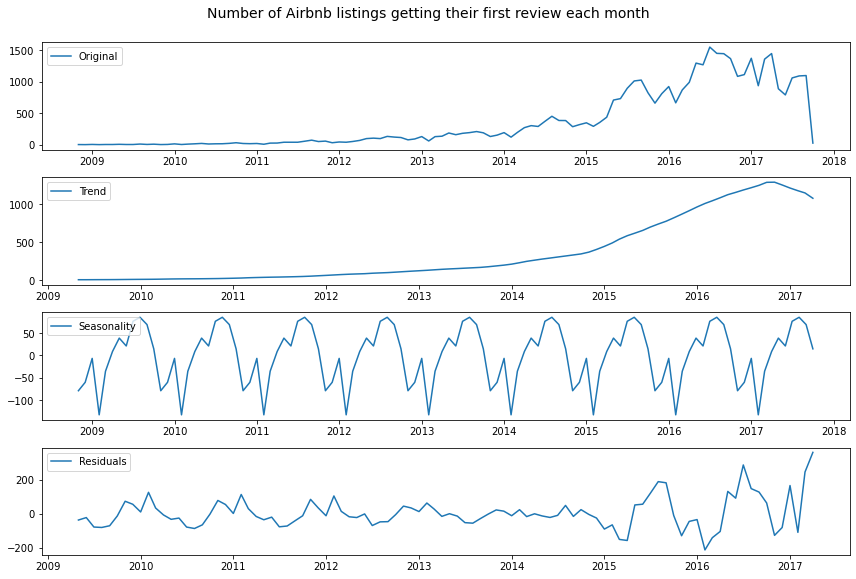

In [23]:
decompose_time_series(ts_first_review, title='Number of Airbnb listings getting their first review each month')